# Curso de Manejo de Datos Faltantes: Detección y Exploración

## Configuración de ambiente de trabajo

```bash
pip install pyjanitor matplotlib==3.5.1 missingno numpy pandas pyreadr seaborn session-info upsetplot==0.6.1
```

o

```bash
pip install -r requirements.txt
```

## Importar librerías

In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot
import wget

c:\Programacion\Python\Python310\lib\site-packages\upsetplot\plotting.py:20: MatplotlibDeprecationWarning: The matplotlib.tight_layout module was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  from matplotlib.tight_layout import get_renderer


## Importar funciones personalizadas

In [2]:
%run notebooks/pandas-missing-extension.ipynb

## Configurar el aspecto general de las gráficas del proyecto

In [3]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

## Operar con valores faltantes

### Python

In [4]:
print(
    None or True,
    None or False,
    None == None,
    #None + True,
    #None / False,
    type(None),
    sep="\n"
)

True
False
True
<class 'NoneType'>


### NumPy

In [5]:
print(
    np.nan or True,
    np.nan == np.nan,
    np.nan is np.nan,
    np.nan / 2,
    type(np.nan),
    np.isnan(np.nan),
    sep="\n"
)

nan
False
True
nan
<class 'float'>
True


> A diferencia de Python *base*, la librería [Numpy](https://numpy.org/) **NO DETIENE LA EJECUCIÓN** al operar con datos faltantes, simplemente nos devuelve otro faltante

### Pandas

In [6]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x = [0, 1, np.nan, np.nan, None],
        y = [0, 1, pd.NA, np.nan, None]
    )
)
test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [7]:
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [8]:
test_missing_df.x.isnull()

0    False
1    False
2     True
3     True
4     True
Name: x, dtype: bool

In [9]:
pd.Series([1, np.nan])

0    1.0
1    NaN
dtype: float64

Pandas es capaz de identificar los tipos de datos y devolvernos el tipo de dato faltante correspondiente a la serie de datos

In [10]:
pd.Series([pd.to_datetime("2023-01-23"), np.nan])

0   2023-01-23
1          NaT
dtype: datetime64[ns]

In [11]:
pd.Series([-1]).isnull()

0    False
dtype: bool

> A diferencia de Numpy que trata los datos faltantes como un *float*, para poder trabajar con el, Pandas los trata de manera explicita como un faltante

## Cargar los conjuntos de datos

### Pima Indians Diabetes

In [12]:
# Definimos una variable para el url donde se encuentran los datos
pima_indians_diabetes_url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [13]:
destination = "./data/pima-indians-diabetes.csv"

url = wget.download(pima_indians_diabetes_url, destination )

In [14]:
diabetes_df = pd.read_csv(
    "./data/pima-indians-diabetes.csv",
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
)

### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de información de los conjuntos de datos

In [15]:
#Guarda la URL en una variable
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
#Guarda los nombres de los archivos a descargar en una lista 
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
#Guarda la extension de los archivos en una variable
extension = ".rda"

#### Descargar y cargar los conjuntos de datos

In [16]:
datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"./data/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }"
    
    wget.download(dataset_url, dataset_output_file )
    ##!wget -q -O { dataset_output_file } { dataset_url }

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

#### Incluir conjuntos de datos en nuestro ambiente local

In [17]:
locals().update(**datasets_dfs)
del datasets_dfs

### Verificar carga

In [18]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

In [19]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

## Tabulación de valores faltantes

In [20]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### Resúmenes básicos de valores faltantes

In [21]:
#Cuantas filas y columnas tenemos en nuestro df
riskfactors_df.shape

(245, 34)

> En lo que sigue, utilizamos las funciones creadas para extender la funcionalidad de pandas ubicadas en `notebooks/pandas-missing-extension.ipynb`

#### Número total de valores completos (sin observaciones faltantes)

In [22]:
riskfactors_df.missing.number_complete()

7144

#### Número total de valores faltantes

In [23]:
riskfactors_df.missing.number_missing()

1186

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

In [24]:
riskfactors_df.missing.missing_variable_summary()
# missing_variable_summary() indica un resumen en cuanto a los datos faltantes por variable.
# Muestra el N° de datos faltantes, el N° de registros y el porcentaje de datos faltantes que representa en el dataframe


,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


###### Tabulación del resumen por variable

In [25]:
riskfactors_df.missing.missing_variable_table()
# missing_variable_table() muestra una tabla con el N° de datos faltantes,
# el N° de variables que contienen esos datos faltantes y 
# el % que representa esa cantidad de variables respecto al total


,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


#### Casos / Observaciones / Filas

##### Resúmenes por caso

In [26]:
riskfactors_df.missing.missing_case_summary()
# missing_case_summary() muestra todos los registros junto al N° de variables con datos faltantes
# el % de esas variables que representa respecto al total

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


###### Tabulación del resumen por caso

In [27]:
riskfactors_df.missing.missing_case_table()
# missing_case_table() muestra una tabla con el N° de datos faltantes,
# la cantidad de registros que contienen ese N° de datos faltantes 
# el % de registros que representan respecto al total de registros


,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


### Intervalos de valores faltantes

In [28]:
(
    riskfactors_df
    .missing.missing_variable_span(
        variable='weight_lbs',
        span_every=50
    )
)
# missing_variable_span() muestra el resumen de datos faltantes, datos completos,
# % de datos faltantes y % de datos completos por bloques de registros


,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


### _Run length_ de valores faltantes

In [29]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)
# La siguiente función muestra el N° de registros consecutivos que están completos 
# seguido del N° de registros consecutivos que tienen datos faltantes

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Visualización inicial de valores faltantes

### Variable

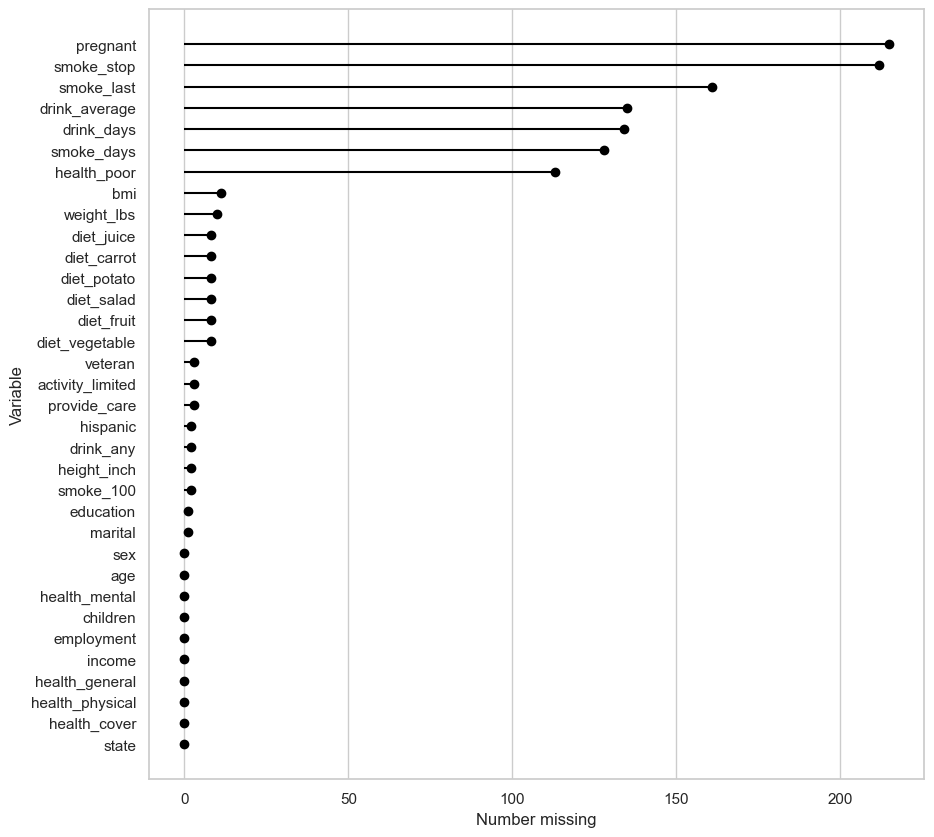

In [30]:
# Gráfica de paletas
riskfactors_df.missing.missing_variable_plot()

### Casos / Observaciones / Filas

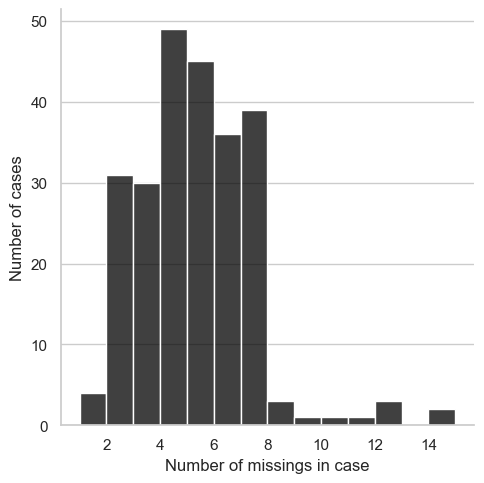

In [31]:
riskfactors_df.missing.missing_case_plot()

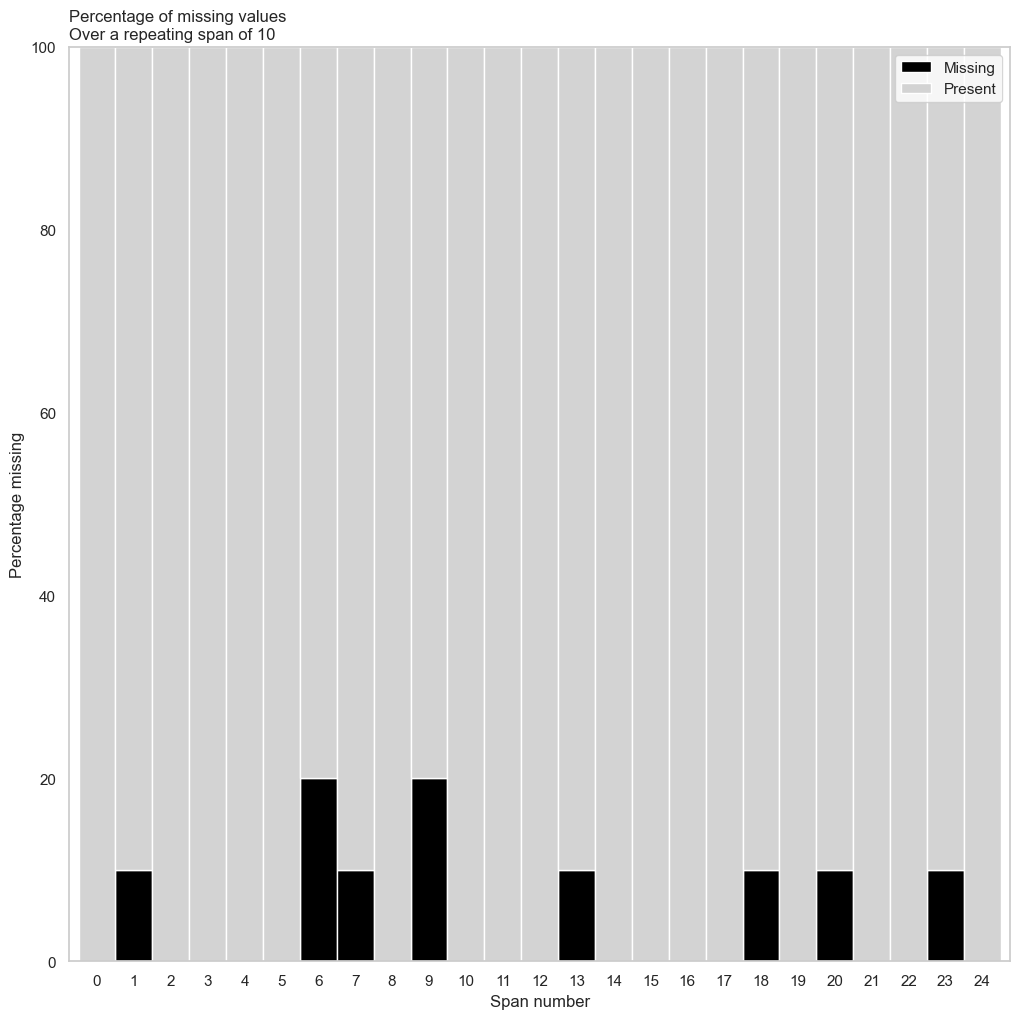

In [32]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable='weight_lbs',
        span_every=10,
        rot=0 #rotacion de los labels
    )
)


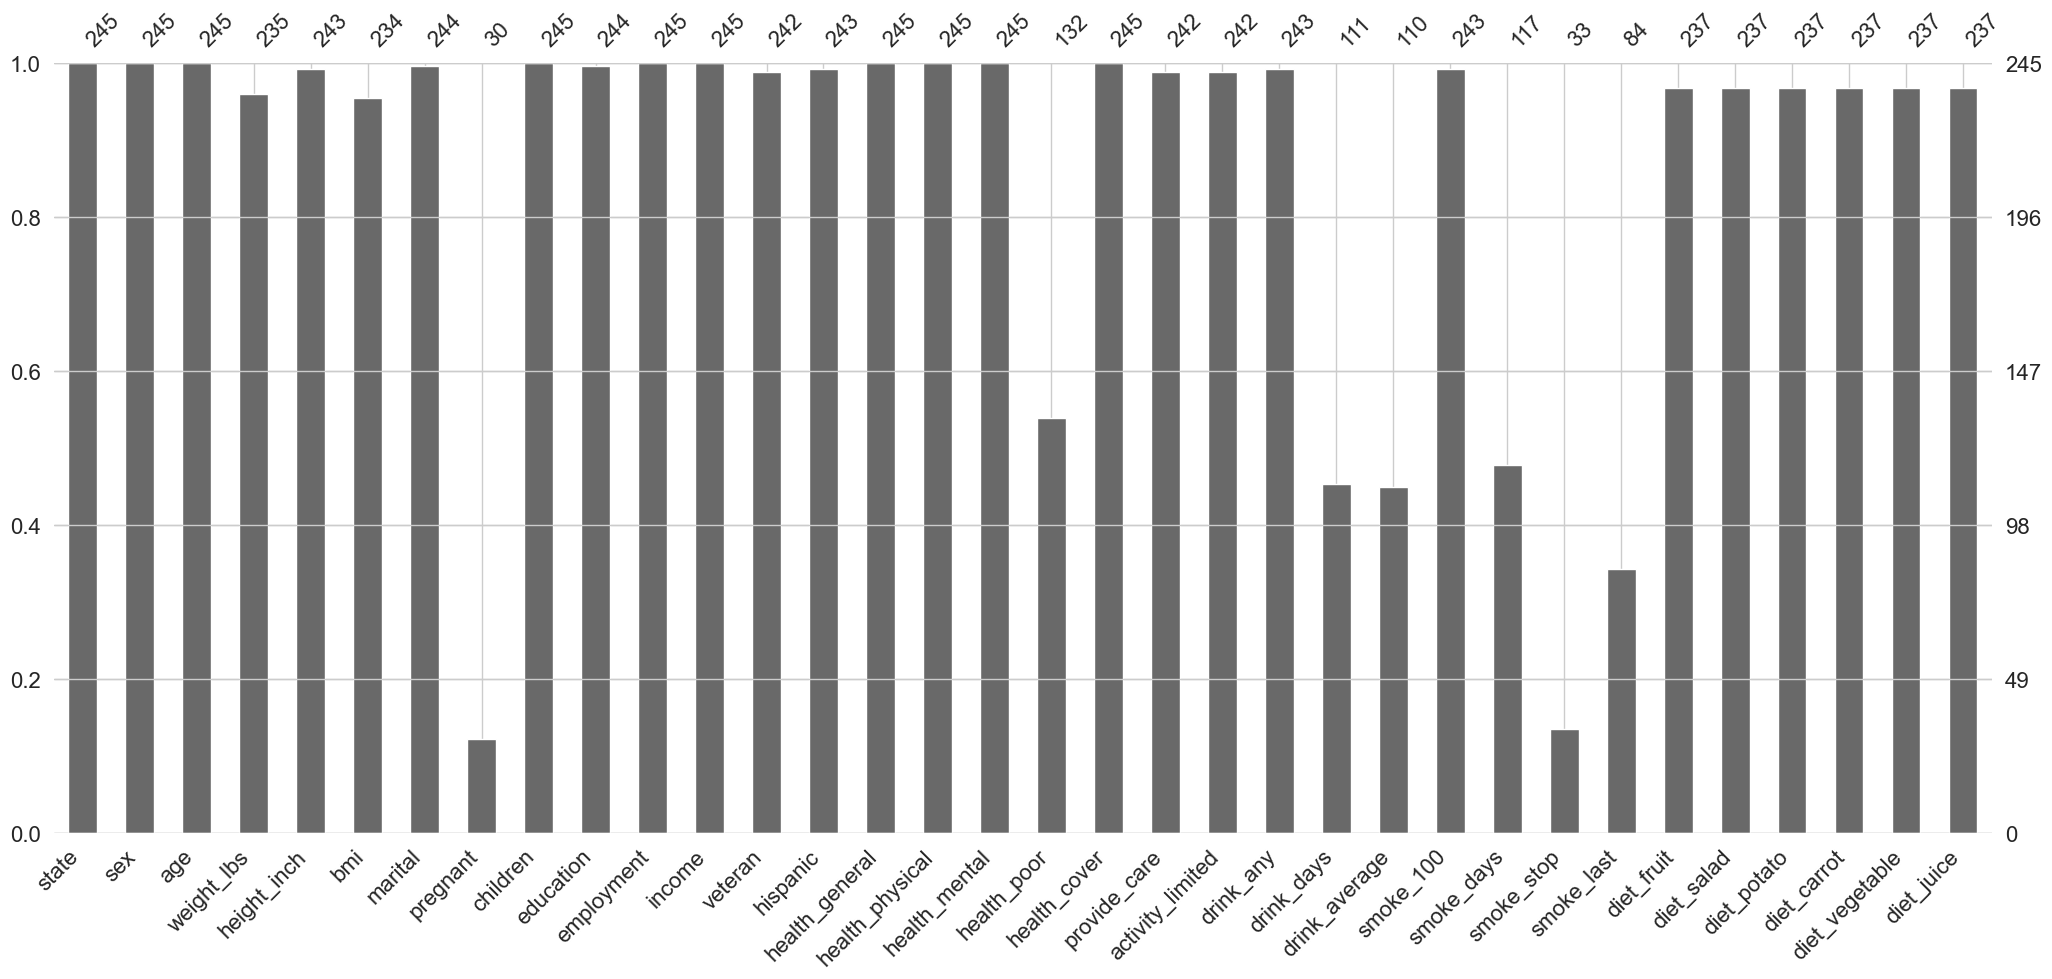

In [33]:
# Visualización mediante una función de pandas
missingno.bar(df = riskfactors_df);

c:\Programacion\Python\Python310\lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\Programacion\Python\Python310\lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


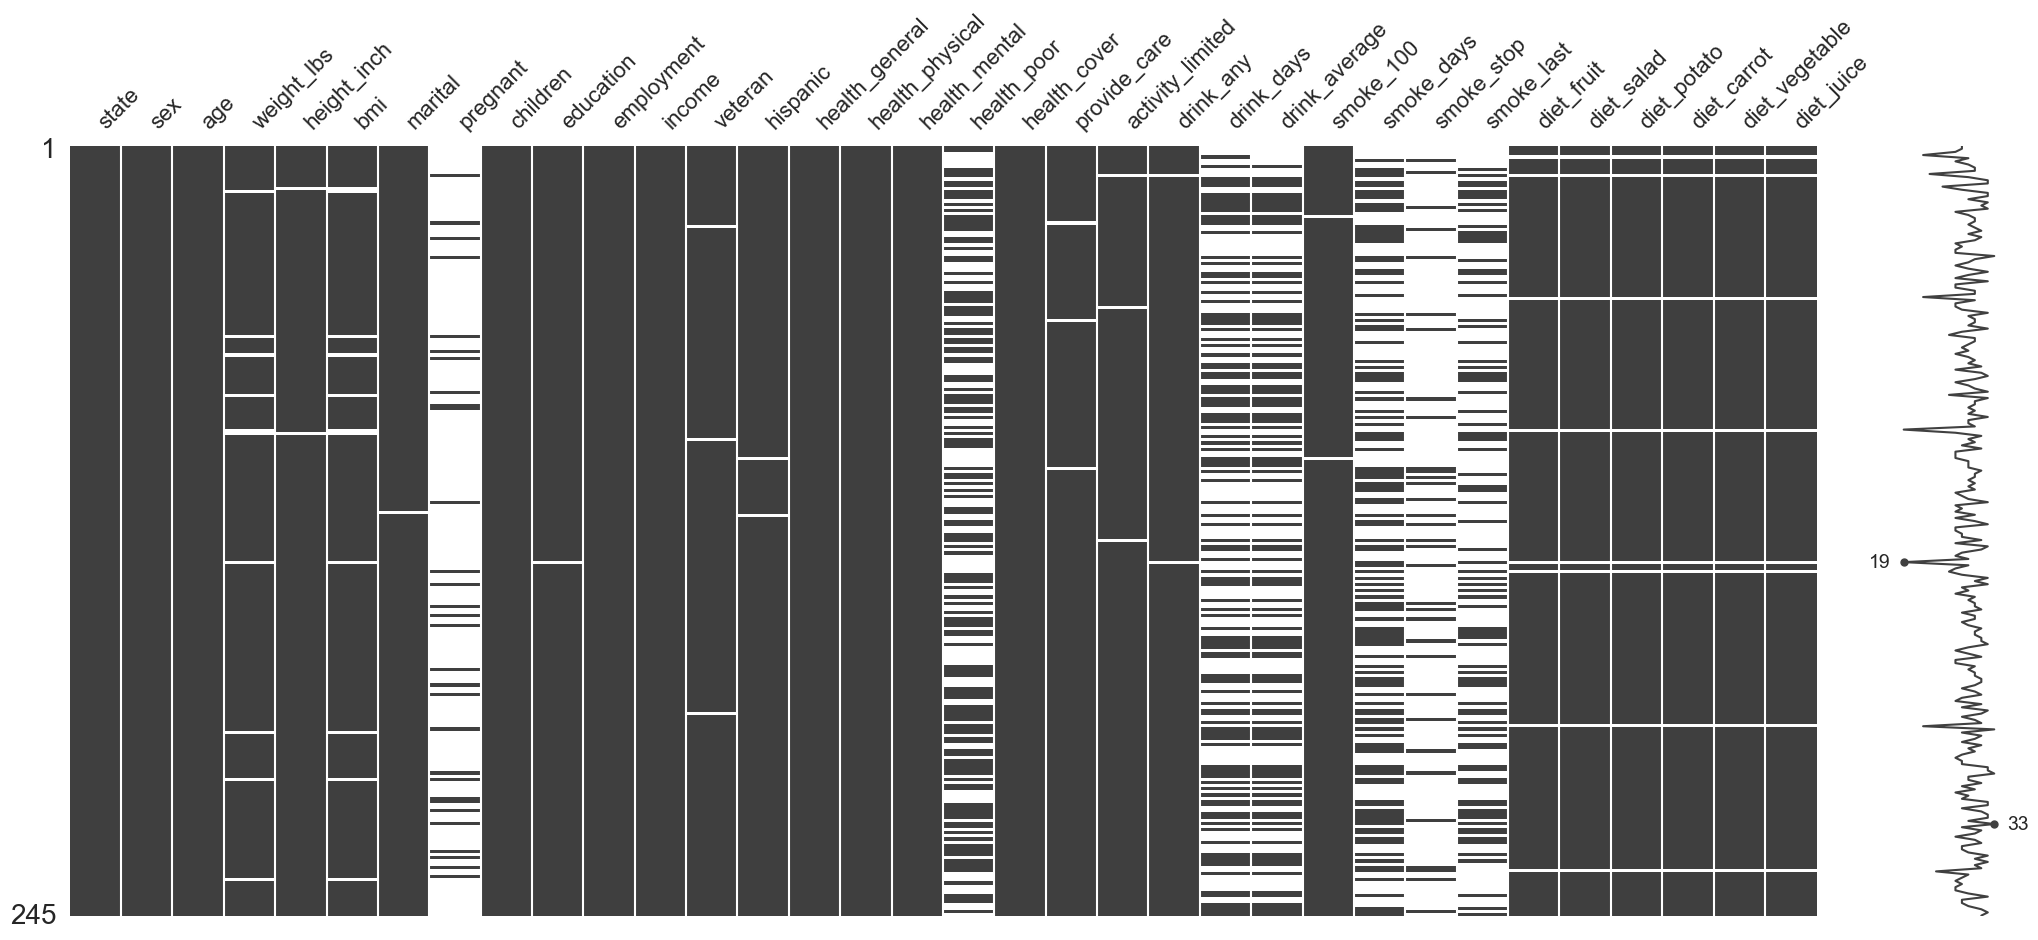

In [34]:
missingno.matrix(df = riskfactors_df);

c:\Programacion\Python\Python310\lib\site-packages\upsetplot\plotting.py:580: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)
c:\Programacion\Python\Python310\lib\site-packages\upsetplot\plotting.py:586: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)


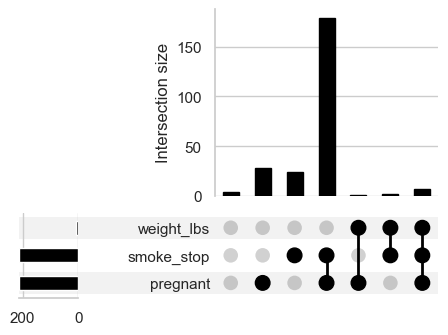

In [35]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=['pregnant', 'weight_lbs', 'smoke_stop'], # None para mostrar la relación de todas las variables
        element_size = 30  # tamaño de la visualización
    )
);


## Codificación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [36]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Números

In [37]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [38]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [42]:
missing_data_example_df.missing.number_missing()

0

#### Revisar tipos de datos

In [43]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

#### Revisar valores únicos de los datos

In [44]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [45]:
(
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

In [46]:
pd.read_csv(
    './data/missing_data_enconding_example.csv',
    na_filter=True,
    na_values=[-99, -1]
)
# sustituye los valores -99 y -1 por nan desde el archivo raíz de esta manera pandas detecta que son valores faltantes

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


#### Sustitución global

In [47]:
(
    missing_data_example_df
    .replace(
        to_replace=[-99, 'NA'],
        value= np.nan
    )
)
# sustituye todos los valores -99 y NA por nan desde el dataframe


,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


#### Sustitución dirigida

In [48]:
(
    missing_data_example_df
    .replace(
        to_replace={
            'x':{
                -99:np.nan
            }
        }
    )
)
# Sustituye los valores -99 por nan solo en la variable x del dataframe

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


## Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [50]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


### Estrategias para la identificación de valores faltantes implícitos

#### Pivotar la tabla de datos

In [51]:
(
    implicit_to_explicit_df
    .pivot_wider(
        index="name",        # variable nombre como filas
        names_from="time",   # variable time como columnas
        values_from="value"  # variable value como valores de la tabla
    )
)

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


#### Cuantificar ocurrencias de n-tuplas

In [52]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=["name"]   # cuenta los valores asociados a los nombres
    )
    .reset_index(name="n")  # asigna n como indice del conteo
    .query("n < 3")         # condición a cumplir por n para que se muestre en la tabla
)


,name,n
1,zelda,1


### Exponer filas faltantes implícitas a explícitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son compatibles.
    </p>
</div>

#### Exponer n-tuplas de valores faltantes

Ejemplo, encontrar los pares faltantes de `name` y `time`.

In [54]:
# Rellena los datos faltantes que le indiquemos
(
    implicit_to_explicit_df
    # janitor
    .complete(
        "name",
        "time"
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


#### Limitar la exposición de n-tuplas de valores faltantes

In [55]:
# limitar los datos que quieres mostrar
(
    implicit_to_explicit_df
    .complete( # formato diccionario con as variables y valores a mostrar
        {'name': ['lynn', 'zelda']},
        {'time': ['morning', 'afternoon']},
        sort=True # ordena los valores de manera que primero muestra los pasados y luego el resto
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,zelda,afternoon,NaN
3,zelda,morning,320.0
4,lynn,night,NaN


#### Rellenar los valores faltantes

In [56]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value= np.nan  # puedes asignar el valor que desees. Por defecto asigna nan
    )
)


,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


#### Limitar el rellenado de valores faltantes implícitos

In [57]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value=0,
        explicit=False
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,0.0
5,zelda,night,0.0


## Tipos de valores faltantes

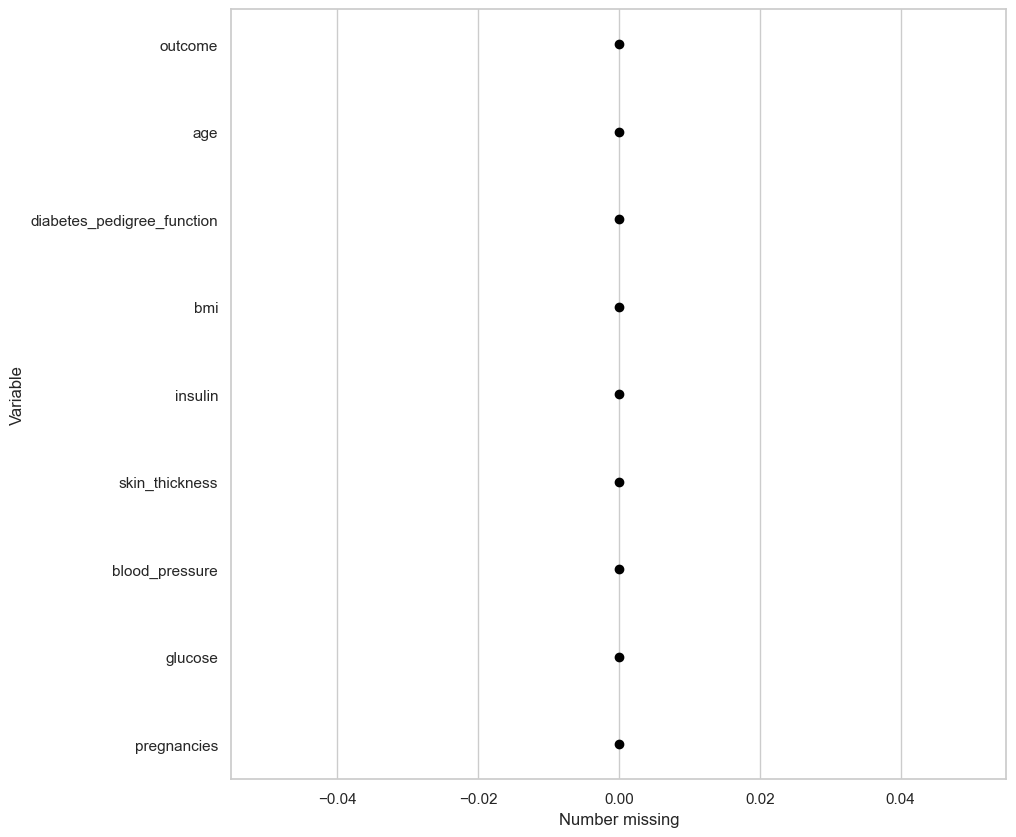

In [59]:
diabetes_df.missing.missing_variable_plot()

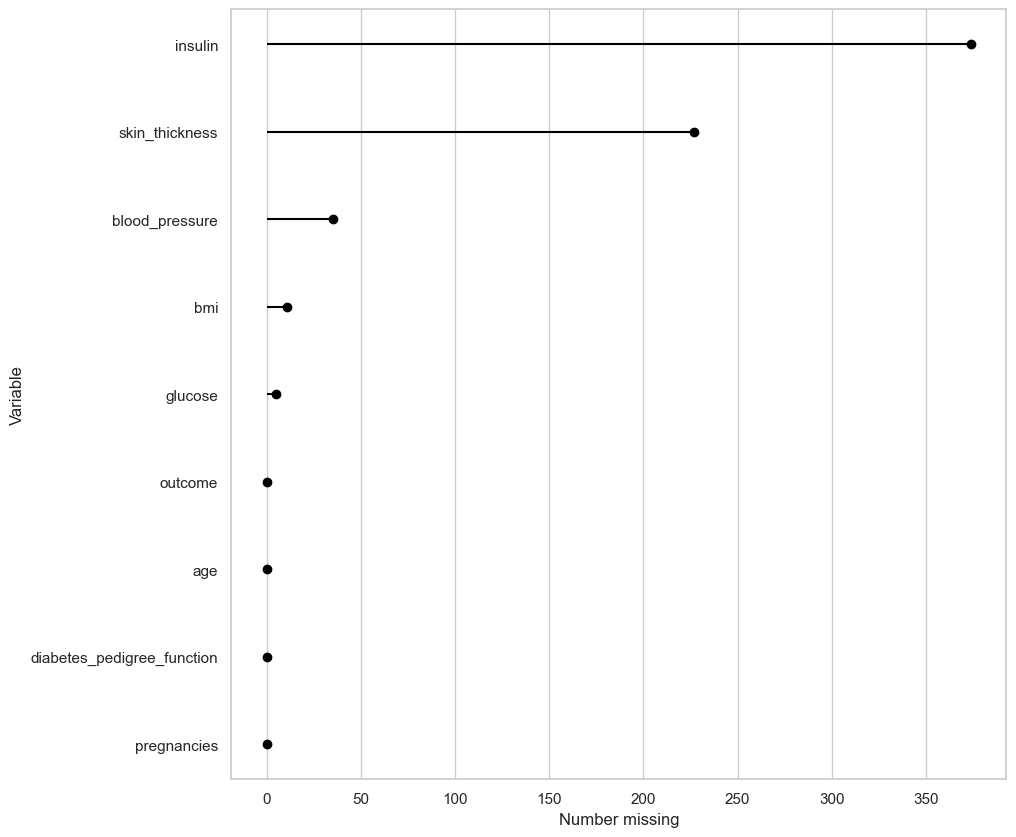

In [60]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0,np.nan)
diabetes_df.missing.missing_variable_plot()

### _Missing Completely At Random_ (MCAR)

c:\Programacion\Python\Python310\lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\Programacion\Python\Python310\lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


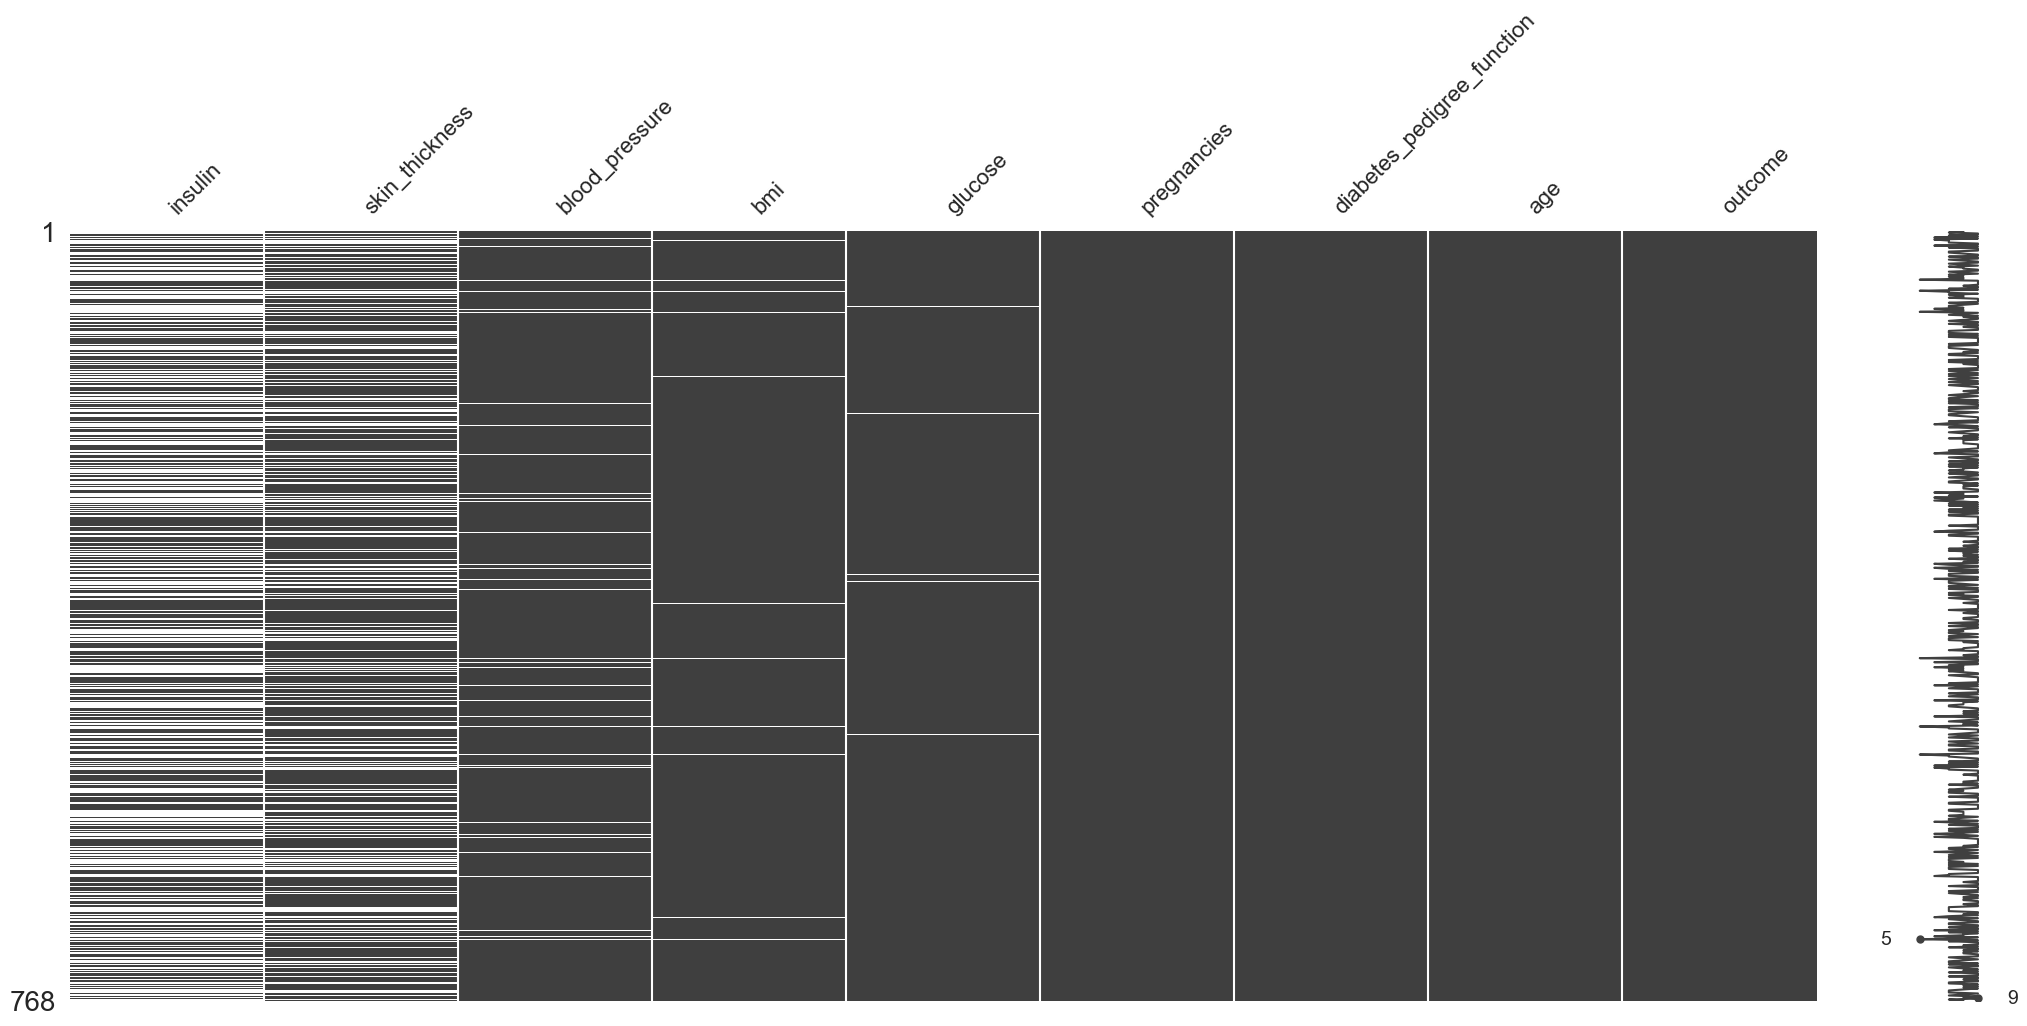

In [62]:
# ordena las columnas desde la que mas tiene valores faltantes a la que menos tiene
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix) # muestra los datos en una matriz de sombra
);

### _Missing At Random_ (MAR)

c:\Programacion\Python\Python310\lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\Programacion\Python\Python310\lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


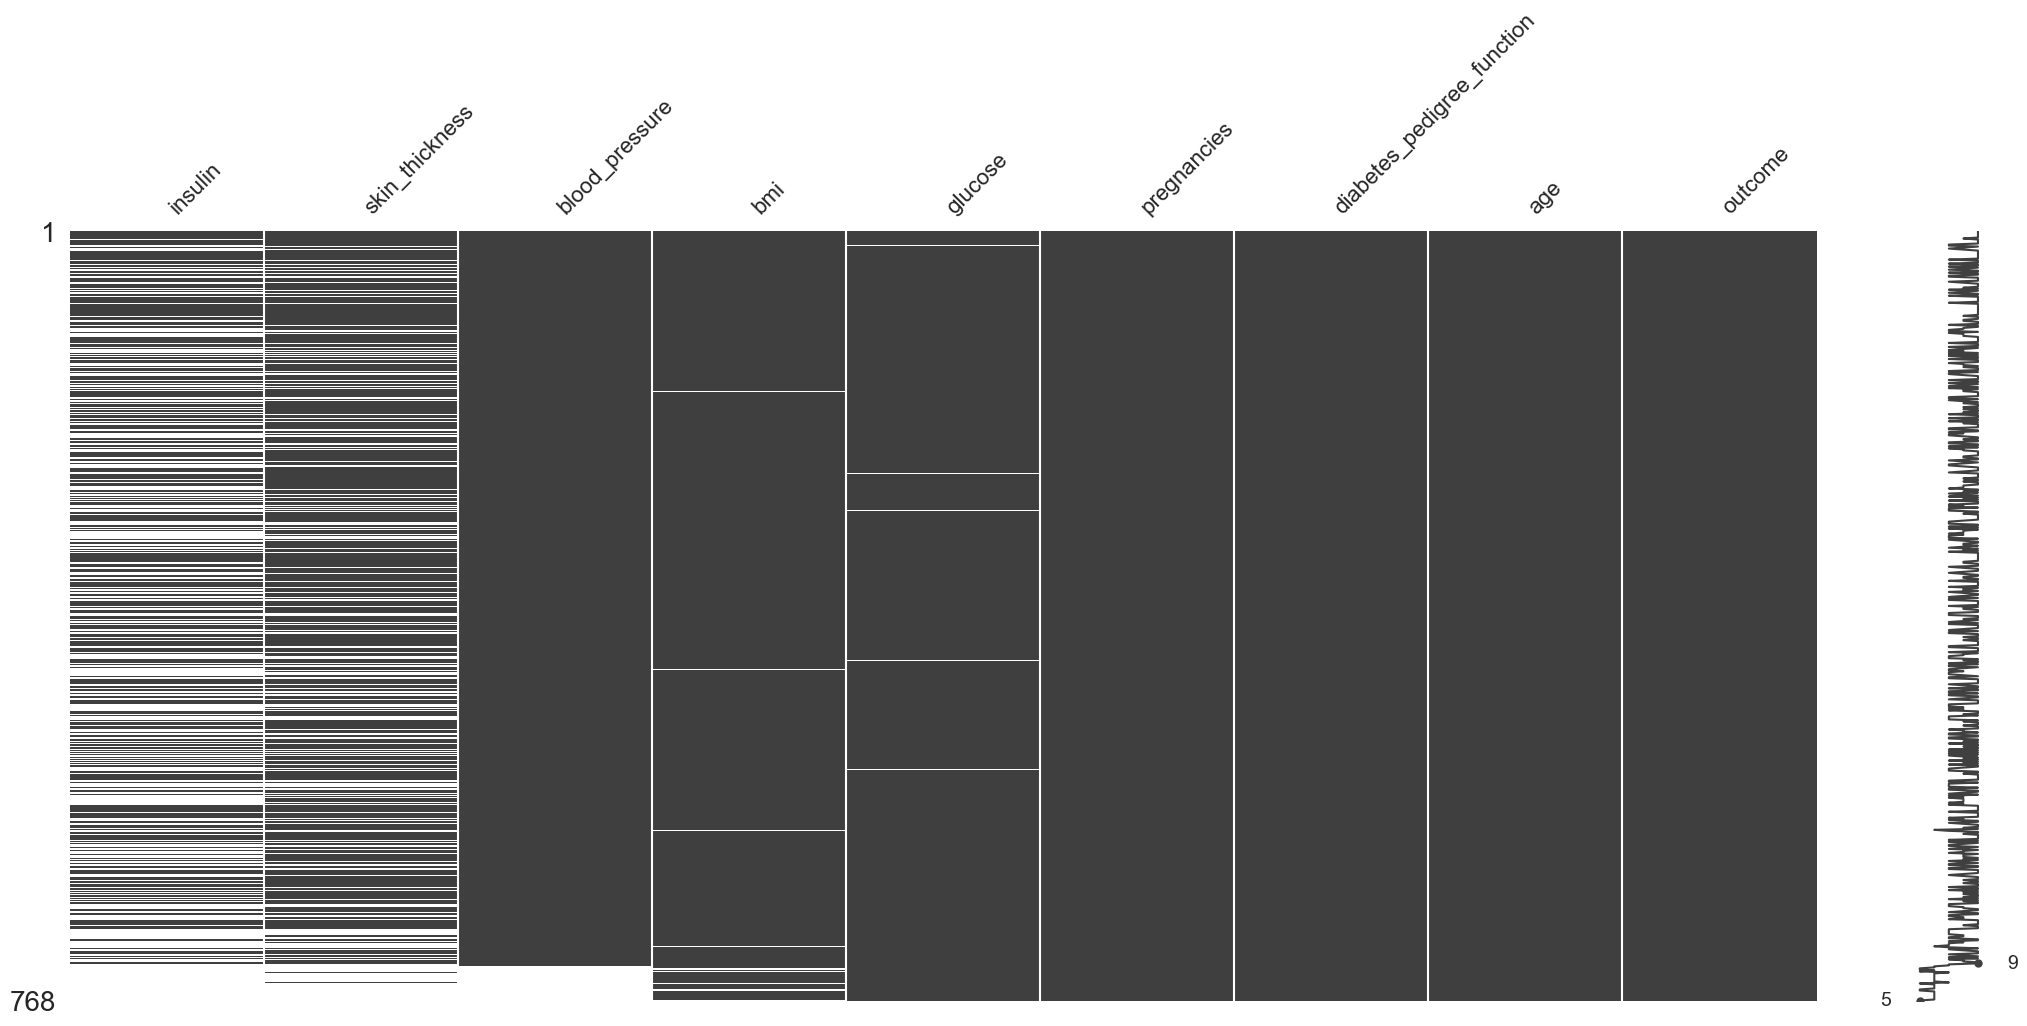

In [63]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='blood_pressure') # ordena los valores segun una columna
    .pipe(missingno.matrix)
);

### _Missing Not At Random_ (MNAR)

c:\Programacion\Python\Python310\lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\Programacion\Python\Python310\lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


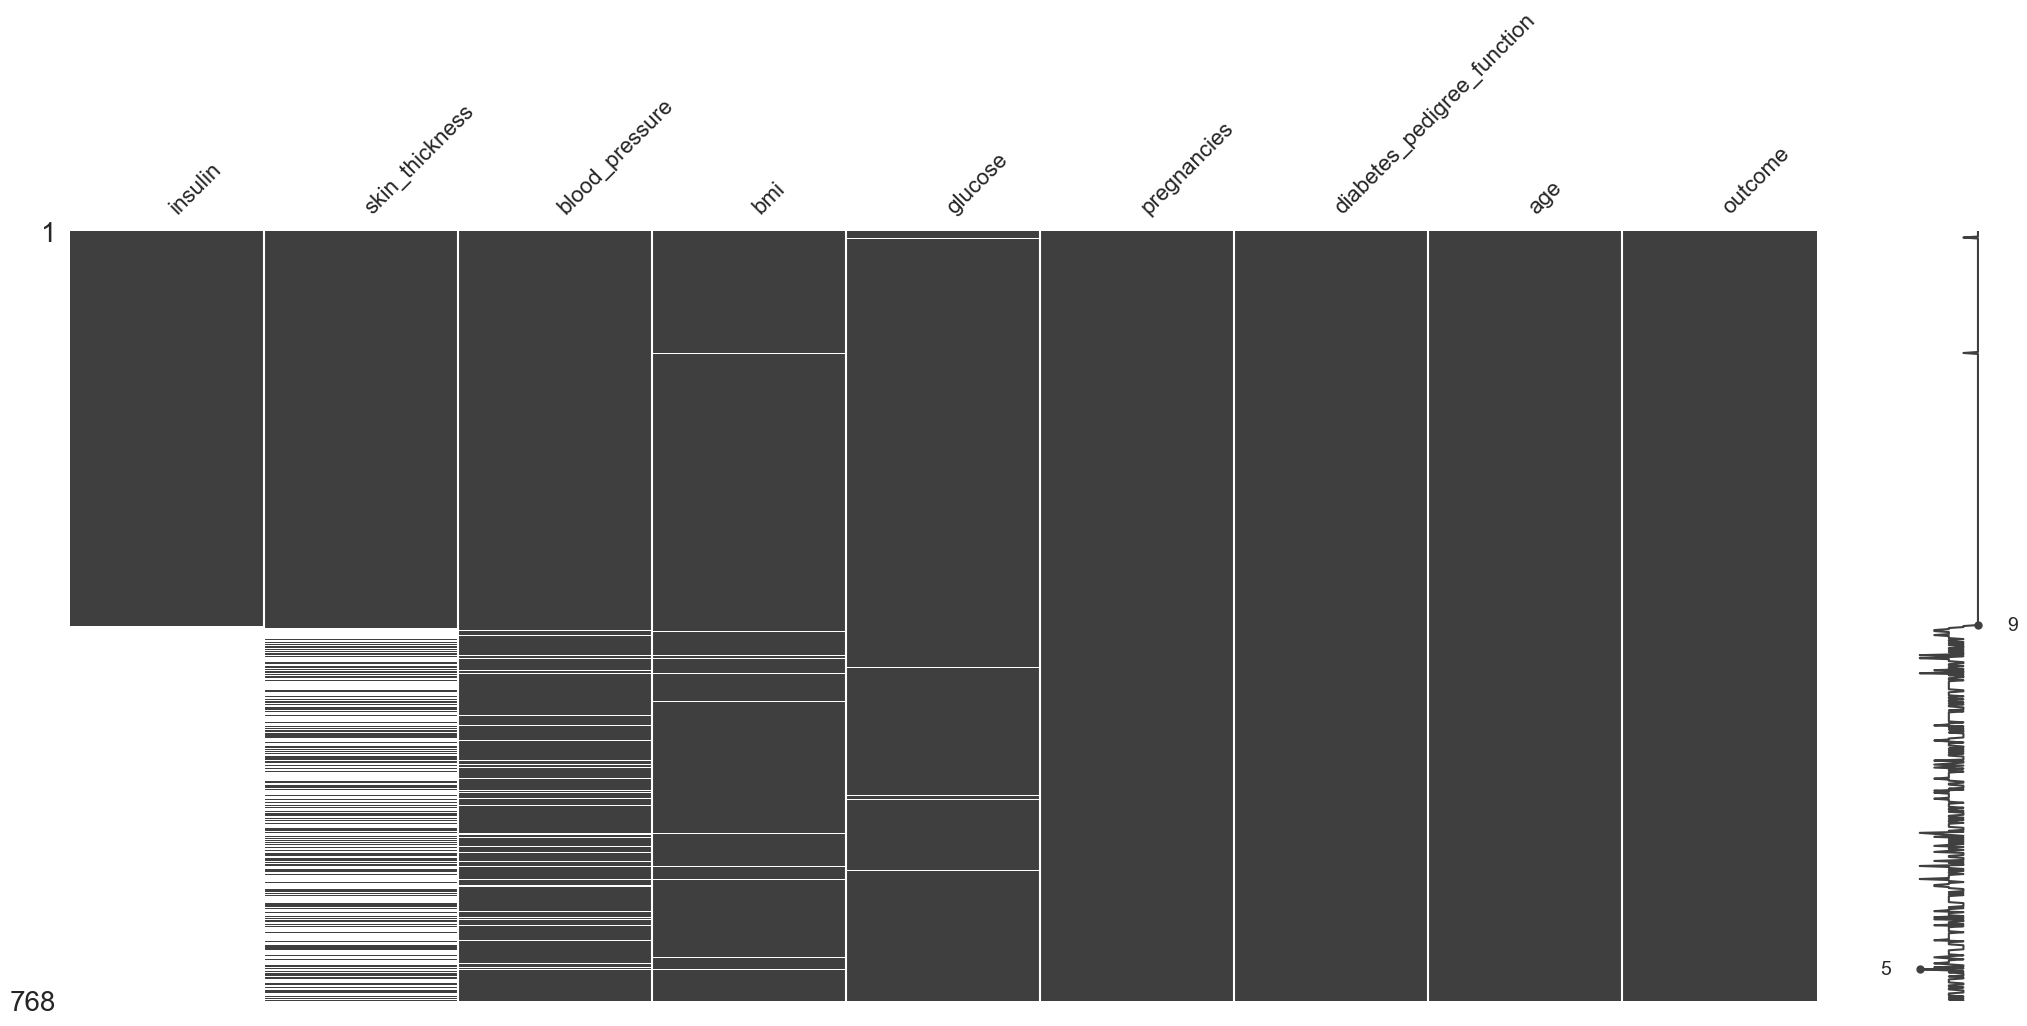

In [64]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='insulin') # ordena los valores segun una columna
    .pipe(missingno.matrix)
);

## Concepto y aplicación de la matriz de sombras (_i.e._, _shadow matrix_)

 ### Construcción de la matriz de sombras

### Utilizar función de utilería `bind_shadow_matrix()`

### Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras

## Visualización de valores faltantes en una variable

## Visualización de valores faltantes en dos variables

## Correlación de nulidad

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    La eliminación de valores faltantes <b>asume</b> que los valores faltantes están perdidos
    completamente al azar (<code>MCAR</code>). En cualquier otro caso, realizar una
    eliminación de valores faltantes podrá ocasionar <b>sesgos</b> en los
    análisis y modelos subsecuentes.
    </p>
</div>

Primero observa el número total de observaciones y variables que tiene tu conjunto de datos.

### _Pairwise deletion_ (eliminación por pares)

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

#### Con base en 1 columna

#### Con base en 2 o más columnas

### Representación gráfica tras la eliminación de los valores faltantes

## Imputación básica de valores faltantes

### Imputación con base en el contexto

In [40]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320


### Imputación de un único valor

## Información de sesión

In [41]:
session_info.show()

c:\Programacion\Python\Python310\lib\site-packages\session_info\main.py:213: DeprecationWarning: Accessing jsonschema.__version__ is deprecated and will be removed in a future release. Use importlib.metadata directly to query for jsonschema's version.
  mod_version = _find_version(mod.__version__)
